In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

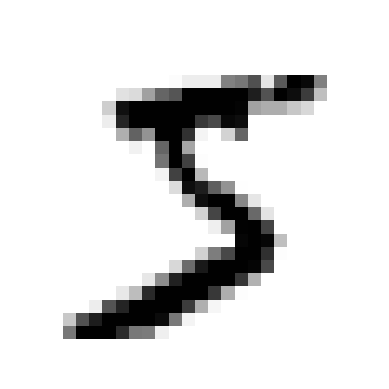

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

some_digit = X[0]
plot_digit(some_digit)

In [8]:
y[0]

'5'

- train_set size = 60000
- test_set size = 10000

In [11]:
size = 60000
X_train, X_test, y_train, y_test = X[:size], X[size:], y[:size], y[size:]

Creating dataset and labels for binary classification of digit 5

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Let's try using SGDClassifier (Stochastic Gradient Descent Classifier)
- Well suited for large datasets
- Best for online learning (as it treats each training instance one at a time)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

Performance Metrics of the Model
- Binary Classification: Binary Cross Entropy
- Multiple Category Classification: Categorical Cross Entropy

However we can use simple metrics like:
- cross_val_score
- accuracy, precision, recall, f1-score

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [21]:
import os
import sys

sys.path.append("/Users/shubhamkumar/Projects/learn-ml/algorithms")

from CV_Score import cv_score
cv_score.cv_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.9646 , 0.96745, 0.96685])

In [22]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [26]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit = (y_scores > threshold)
y_some_digit

array([ True])

In [30]:
threshold = 3000
y_some_digit = (y_scores > threshold)
y_some_digit

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [34]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [35]:
y_scores.shape

(60000,)

In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

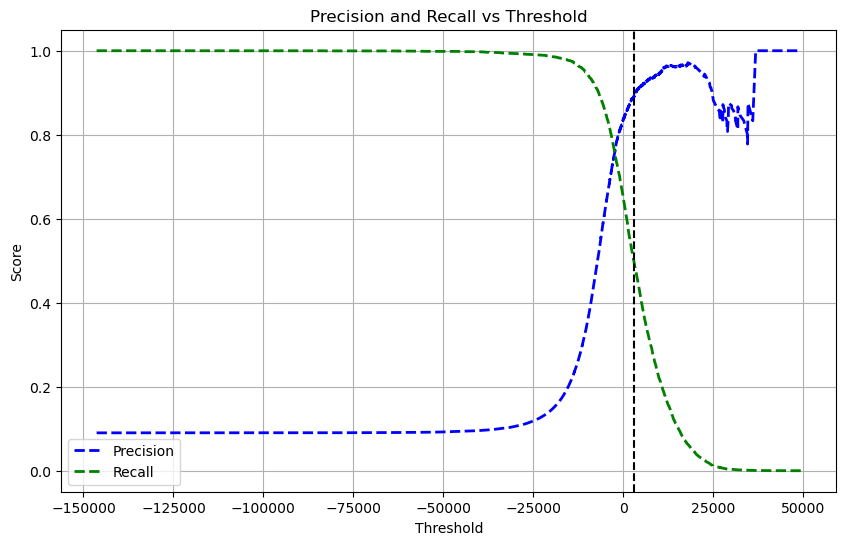

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
plt.axvline(3000, c="black", linestyle="--")
plt.title("Precision and Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

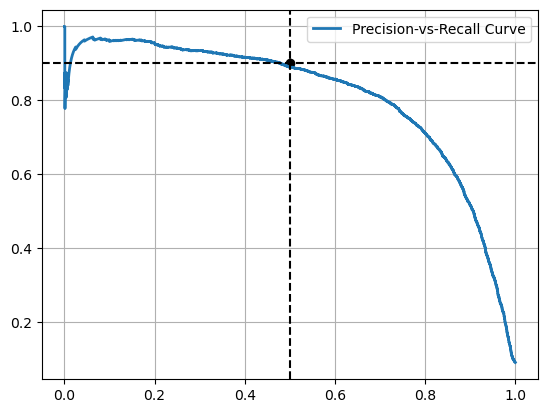

In [49]:
plt.plot(recalls, precisions, linewidth=2, label="Precision-vs-Recall Curve")
plt.axhline(0.9, c='black', linestyle='--')
plt.axvline(0.5, c='black', linestyle='--')
plt.scatter(0.5, 0.9, c = 'black')
plt.grid()
plt.legend()
plt.show()

In [50]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.019499144183

In [51]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [52]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [62]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.predict(X_test)

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [67]:
y_pred = knn_clf.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[ 974,    0,   11,    0,    3,    5,    5,    0,    8,    5],
       [   1, 1133,    8,    3,    7,    0,    3,   22,    3,    7],
       [   1,    2,  991,    3,    0,    0,    0,    4,    5,    3],
       [   0,    0,    2,  976,    0,   12,    0,    0,   13,    9],
       [   0,    0,    1,    1,  944,    2,    3,    3,    6,    7],
       [   1,    0,    0,   13,    0,  862,    2,    0,   12,    3],
       [   2,    0,    1,    1,    4,    4,  945,    0,    5,    1],
       [   1,    0,   15,    6,    2,    1,    0,  988,    5,   10],
       [   0,    0,    3,    3,    1,    2,    0,    0,  913,    2],
       [   0,    0,    0,    4,   21,    4,    0,   11,    4,  962]])

In [69]:
from sklearn.model_selection import GridSearchCV

gs_knn_clf = GridSearchCV(KNeighborsClassifier(),
                          param_grid={'weights':['uniform', 'distance'],
                                     'n_neighbors':[3, 5, 7]},
                          cv=3 )

In [74]:
%%time
gs_knn_clf.fit(X_train, y_train)

CPU times: user 15min 53s, sys: 1min 15s, total: 17min 8s
Wall time: 5min 29s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [75]:
gs_knn_clf.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 7]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [80]:
gs_knn_clf.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [84]:
y_pred = gs_knn_clf.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[ 974,    0,    9,    0,    0,    4,    4,    0,    7,    3],
       [   1, 1133,    7,    1,    5,    1,    3,   18,    0,    4],
       [   1,    2,  997,    4,    0,    0,    0,    4,    3,    2],
       [   0,    0,    2,  975,    0,   12,    0,    0,   13,    7],
       [   0,    0,    0,    1,  948,    2,    4,    2,    5,    9],
       [   1,    0,    0,   13,    0,  860,    3,    0,   11,    4],
       [   2,    0,    1,    1,    5,    5,  944,    0,    3,    1],
       [   1,    0,   14,    7,    4,    1,    0,  994,    4,    8],
       [   0,    0,    2,    4,    1,    3,    0,    0,  923,    2],
       [   0,    0,    0,    4,   19,    4,    0,   10,    5,  969]])

In [86]:
best_knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [88]:
y_pred = best_knn_clf.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[ 974,    0,    9,    0,    0,    4,    4,    0,    7,    3],
       [   1, 1133,    7,    1,    5,    1,    3,   18,    0,    4],
       [   1,    2,  997,    4,    0,    0,    0,    4,    3,    2],
       [   0,    0,    2,  975,    0,   12,    0,    0,   13,    7],
       [   0,    0,    0,    1,  948,    2,    4,    2,    5,    9],
       [   1,    0,    0,   13,    0,  860,    3,    0,   11,    4],
       [   2,    0,    1,    1,    5,    5,  944,    0,    3,    1],
       [   1,    0,   14,    7,    4,    1,    0,  994,    4,    8],
       [   0,    0,    2,    4,    1,    3,    0,    0,  923,    2],
       [   0,    0,    0,    4,   19,    4,    0,   10,    5,  969]])

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1001
           1       1.00      0.97      0.98      1173
           2       0.97      0.98      0.98      1013
           3       0.97      0.97      0.97      1009
           4       0.97      0.98      0.97       971
           5       0.96      0.96      0.96       892
           6       0.99      0.98      0.98       962
           7       0.97      0.96      0.96      1033
           8       0.95      0.99      0.97       935
           9       0.96      0.96      0.96      1011

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [102]:
X_train.shape

(60000, 784)

In [106]:
X_train[0].shape

(784,)

- upshift: [0:28]
- downShift:[-28:]
- leftShift:[0:784:28]
- rightShift:[27:784:28]

In [206]:
def shift_one_px(mat):
    mat = mat.reshape(28, 28)

    up = np.zeros_like(mat)
    down = np.zeros_like(mat)
    left = np.zeros_like(mat)
    right = np.zeros_like(mat)

    up[:-1, :] = mat[1:, :]
    down[1:, :] = mat[:-1, :]
    left[:, :-1] = mat[:, 1:]
    right[:, 1:] = mat[:, :-1]

    up = up.reshape(784,)
    down = down.reshape(784,)
    left = left.reshape(784,)
    right = right.reshape(784,)
    
    return up, down, left, right

In [208]:
import numpy as np
up, down, left, right = shift_one_px(X_train[0].reshape(28, 28))
print(up.shape, down.shape, left.shape, right.shape)

(784,) (784,) (784,) (784,)


In [210]:
up

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136,
       175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253,
       253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 25

In [212]:
# Prepare a list to collect augmented data and labels
augmented_images = []
augmented_labels = []

for image, label in zip(X_train, y_train):
    up, down, left, right = shift_one_px(image)
    augmented_images.extend([up, down, left, right])
    augmented_labels.extend([label, label, label, label])  # Use the same label for each augmented image

# Convert the list of augmented images and labels back to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
X_expanded = np.concatenate((X_train, augmented_images), axis=0)
y_expanded = np.concatenate((y_train, augmented_labels), axis=0)

# Now X_expanded and y_expanded contain both the original and augmented images and labels
print("Original training data shape:", X_train.shape)
print("Augmented training data shape:", augmented_images.shape)
print("Expanded training data shape:", X_expanded.shape)
print("Expanded labels shape:", y_expanded.shape)

Original training data shape: (60000, 784)
Augmented training data shape: (240000, 784)
Expanded training data shape: (300000, 784)
Expanded labels shape: (300000,)


In [215]:
best_knn_clf.fit(X_expanded, y_expanded)
y_pred = best_knn_clf.predict(X_test)

In [216]:
confusion_matrix(y_pred, y_test)

array([[ 974,    0,    5,    0,    1,    2,    5,    0,    6,    1],
       [   1, 1132,    2,    2,    4,    2,    4,   18,    0,    4],
       [   1,    2, 1006,    2,    0,    0,    0,    3,    2,    1],
       [   0,    0,    2,  983,    0,    9,    0,    0,    9,    5],
       [   0,    1,    2,    1,  951,    0,    2,    3,    4,    6],
       [   1,    0,    0,   10,    0,  867,    2,    0,    9,    5],
       [   2,    0,    2,    0,    4,    5,  945,    0,    3,    1],
       [   1,    0,   12,    6,    3,    1,    0,  997,    3,   10],
       [   0,    0,    1,    4,    0,    3,    0,    0,  933,    1],
       [   0,    0,    0,    2,   19,    3,    0,    7,    5,  975]])

In [217]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       994
           1       1.00      0.97      0.98      1169
           2       0.97      0.99      0.98      1017
           3       0.97      0.98      0.97      1008
           4       0.97      0.98      0.97       970
           5       0.97      0.97      0.97       894
           6       0.99      0.98      0.98       962
           7       0.97      0.97      0.97      1033
           8       0.96      0.99      0.97       942
           9       0.97      0.96      0.97      1011

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

